## Import Libraries

In [31]:
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
from pm4py.visualization.petri_net import visualizer as pn_visualizer
from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner
from pm4py.visualization.heuristics_net import visualizer as hn_visualizer
from pm4py.algo.conformance.tokenreplay import algorithm as token_replay
from pm4py.algo.evaluation.precision import algorithm as precision_evaluator
import pm4py.objects.conversion.heuristics_net.variants.to_petri_net as hn_to_petri_converter 

Create Log variable

In [32]:
log = xes_importer.apply('../dataset/Road_Traffic_Fine_Management_Process.xes')

parsing log, completed traces :: 100%|██████████| 150370/150370 [00:36<00:00, 4168.89it/s]


## Alpha miner algorithm

In [33]:
net_alpha, initial_marking_alpha, final_marking_alpha = alpha_miner.apply(log)

Visualize the resulting petri net

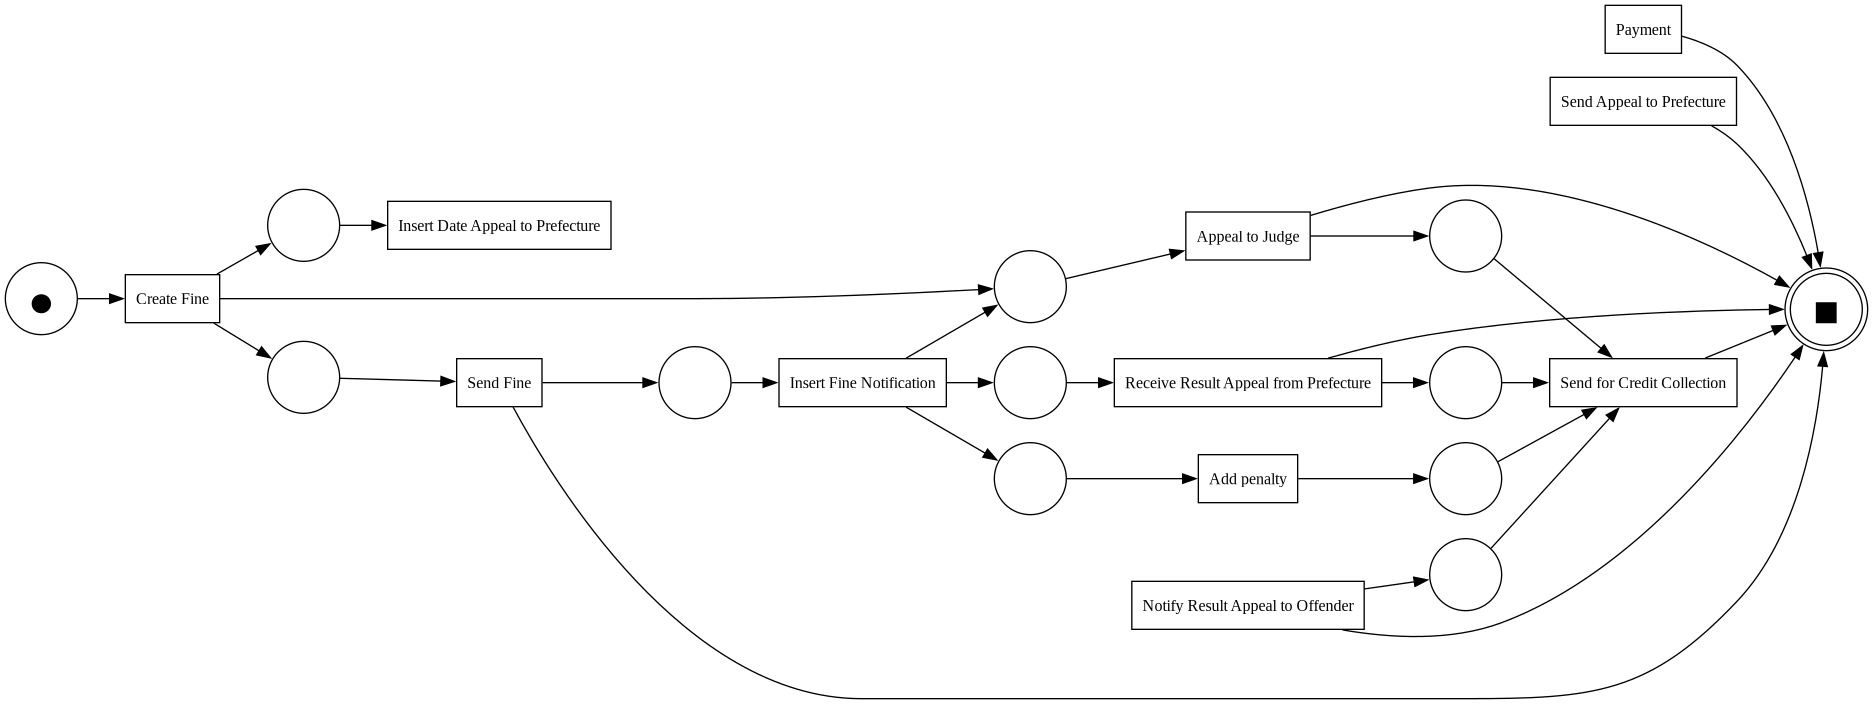

In [34]:
gviz = pn_visualizer.apply(net_alpha, initial_marking_alpha, final_marking_alpha)
pn_visualizer.view(gviz)

Calculate fitness of the algoritm

In [35]:
replay_result_alpha = token_replay.apply(log, net_alpha, initial_marking_alpha, final_marking_alpha)
fitness_alpha = replay_result_alpha[1]

replaying log with TBR, completed traces :: 100%|██████████| 231/231 [00:01<00:00, 166.61it/s]


## Heuristic miner algorithm

In [36]:
heu_net = heuristics_miner.apply_heu(log)

Visualize the model

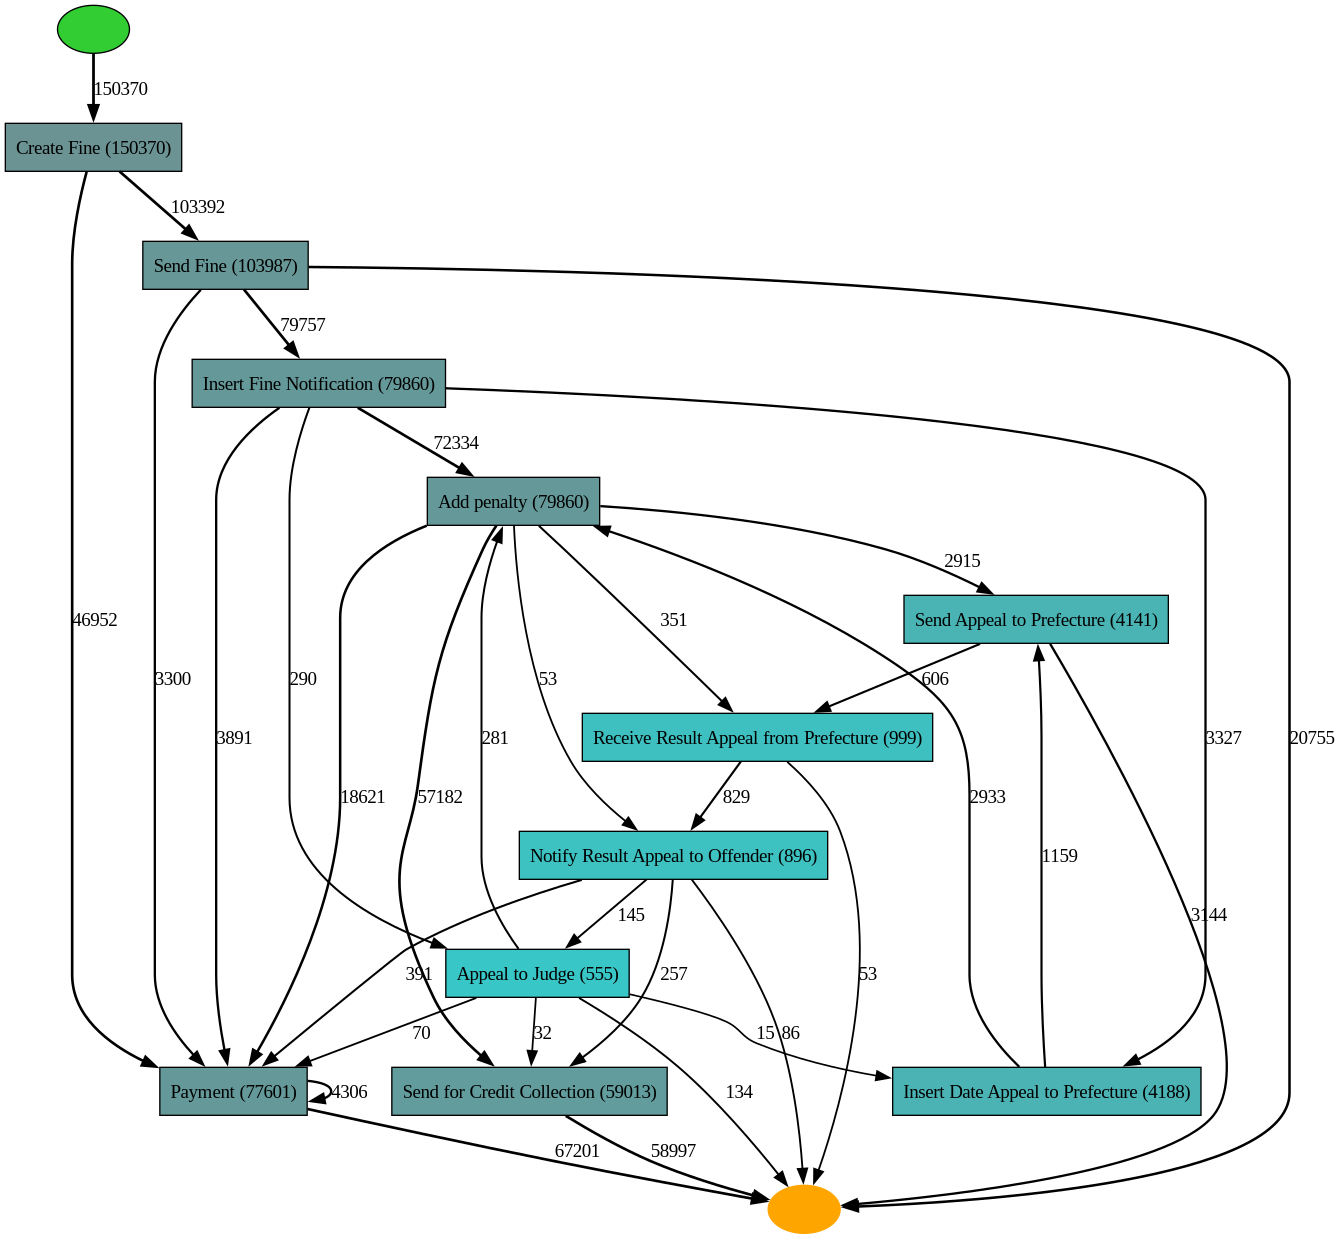

In [37]:
gviz = hn_visualizer.apply(heu_net)
hn_visualizer.view(gviz)

Convert heuristics net to petri net

In [38]:
net_heuristic, initial_marking_heuristic, final_marking_heuristic = hn_to_petri_converter.apply(heu_net)

Calculate fitness

In [39]:
replay_result_heuristic = token_replay.apply(log, net_heuristic, initial_marking_heuristic, final_marking_heuristic)

replaying log with TBR, completed traces :: 100%|██████████| 231/231 [00:03<00:00, 69.71it/s] 


## Results

Calculate alpha algoritm fitness

In [44]:
fitness_values_alpha = [trace['trace_fitness'] for trace in replay_result_alpha]
average_fitness_alpha = sum(fitness_values_alpha) / len(fitness_values_alpha)
print("Alpha Miner Average Fitness:", average_fitness_alpha)

Alpha Miner Average Fitness: 0.6741431381487306


Calculate precision

In [45]:
precision_alpha = precision_evaluator.apply(log, net_alpha, initial_marking_alpha, final_marking_alpha)
print("Alpha Miner Precision:", precision_alpha)

replaying log with TBR, completed traces :: 100%|██████████| 271/271 [00:00<00:00, 1449.26it/s]


Alpha Miner Precision: 0.6623544318535728


Calculate heuristics algorithm fitness

In [46]:
fitness_values_heuristic = [trace['trace_fitness'] for trace in replay_result_heuristic]
average_fitness_heuristic = sum(fitness_values_heuristic) / len(fitness_values_heuristic)
print("Heuristic Miner Average Fitness:", average_fitness_heuristic)

Heuristic Miner Average Fitness: 0.9184939530367805


Calculate heuristics algorithm precision

In [47]:
precision_heuristic = precision_evaluator.apply(log, net_heuristic, initial_marking_heuristic, final_marking_heuristic)
print("Heuristic Miner Precision:", precision_heuristic)

computing precision with alignments, completed variants :: 100%|██████████| 271/271 [00:00<00:00, 498.56it/s]


Heuristic Miner Precision: 0.9913566987504848
